In [7]:
from tqdm.notebook import tqdm

import numpy as np, math

from scipy.stats import norm, kstest, expon, lognorm, cauchy

import matplotlib.pyplot as plt
import seaborn as sb

# Demonstrate CLT

Requirements of the i.i.d.:
1. Finite, Fixed population variance

The following are the distributions that obey this:
1. uniform distribution from `a` to `b`
2. exponential distribution, $P(X=x) = e^{-x} \, ,\, \forall \, x \ge 0$
3. Normal distribution

The following are the distributions that disobey this:
1. non-fixed but finite variance: 
    - lognormal
    - 
2. infinite variance: Cauchy Distribution


## Uniform Distribution
Observe that in the below graphs of uniform distribution for different values of sample sizes:
1. $\mathbb{E}\left[\bar{X}\right] = \mu$
2. $Var.(\bar{X}) = \dfrac{\sigma^2}{n}$
3. **Note**: the above two points were **not** part of CLT, they were rather i.i.d. based identities where the population has a fixed and finite mean and variance.
4. when calculating the KS statistic between the actual distribution of sample mean and the CLT-expected distribution
    - the KS statistic value is quite low (generally this is in 0 to 1)
    - the p-value is significant enough to not let us reject the null hypothesis.
    - the null hypothesis of a KS test is that the two distributions are identical

Note: While calculating variance across a batch of sample means, you wouldn't need Bessel correction because these sample mean values themselves are not constrained. The no. of sample means = no. of degrees of freedom = 500 in the case below.

For a population having a uniform distribution between -10 and 10:
 mean = 0.0, variance = 33.33333333333334


Randomly sampling 10 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00<?,…

Randomly sampling 100 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00<?…

Randomly sampling 1000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00<…

Randomly sampling 10000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:00…

Randomly sampling 100000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:0…

Randomly sampling 1000000 points using uniform(-10, 10) + calculating sample mean:   0%|          | 0/500 [00:…

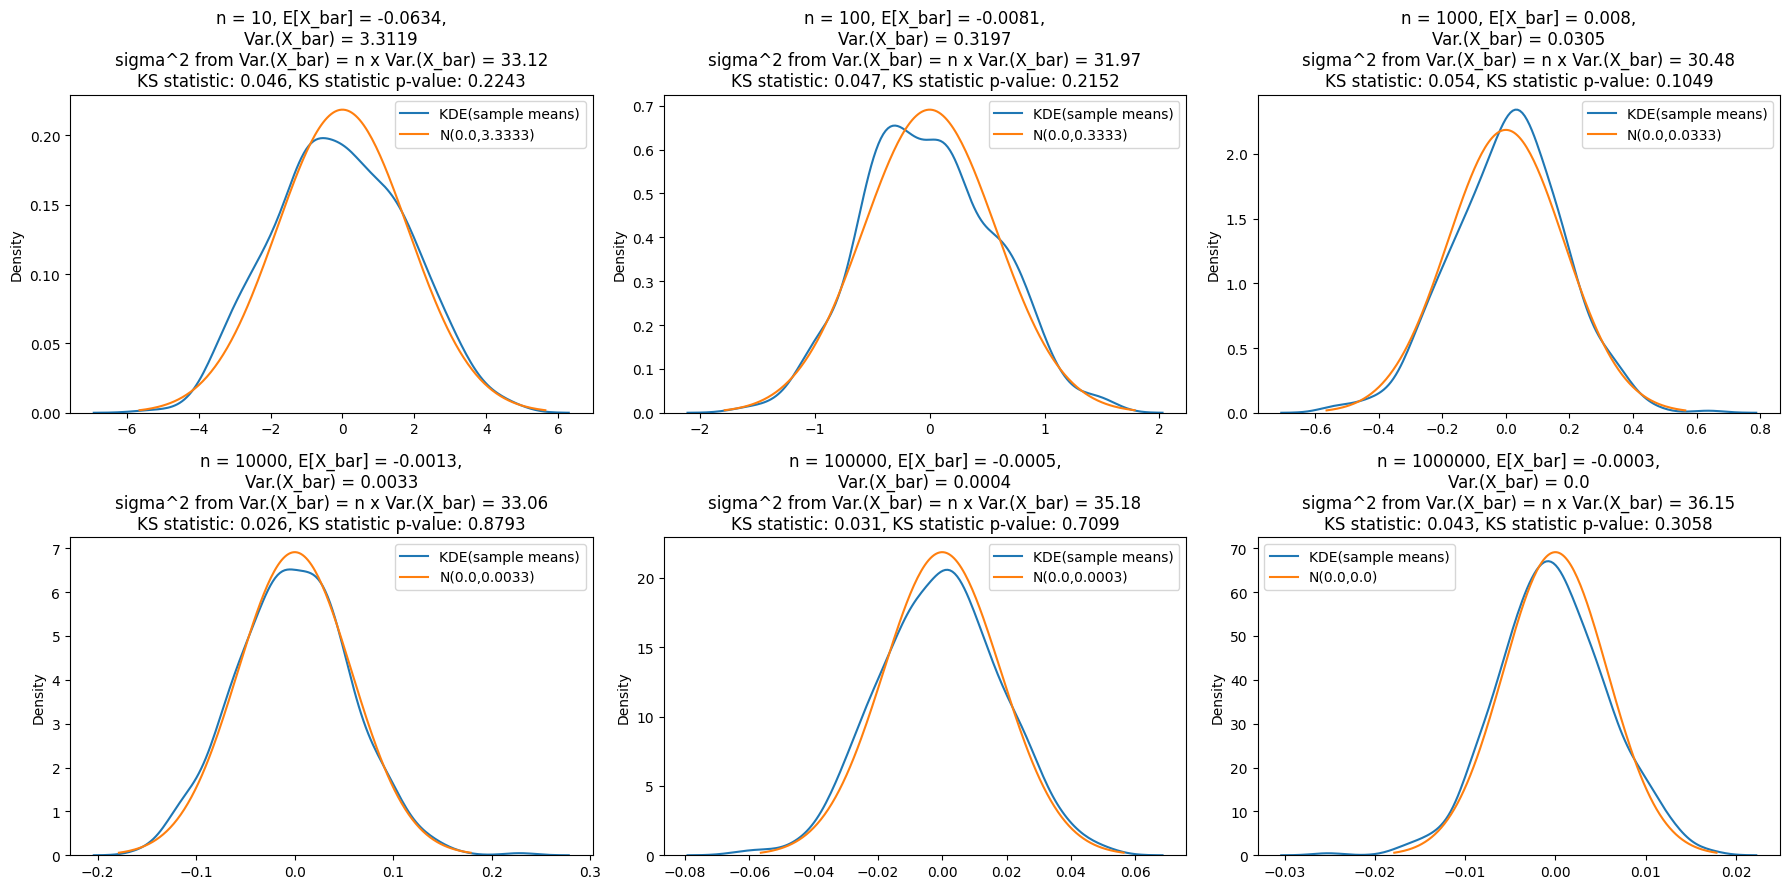

In [12]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# uniform distribution
uniform_a, uniform_b = -10, 10
uniform_mu, uniform_sigma = (uniform_a + uniform_b)/2, math.sqrt(((uniform_b-uniform_a) ** 2)/12)
print(f"For a population having a uniform distribution between {uniform_a} and {uniform_b}:"
    f"\n mean = {uniform_mu}, variance = {uniform_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using uniform({uniform_a}, {uniform_b}) + calculating sample mean"):
        sample_means.append(np.random.uniform(low = -10, high = 10, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = uniform_mu
    sample_mean_clt_std = uniform_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

## Exponential Distribution

1. standardized exponential distribution: $P(X = x) = \begin{cases} e^{-x} & x \ge 0 \\ 0 & \textrm{ otherwise } \end{cases}$
    1. for this, the population mean = 1, and the population variance = 1
2. scaled and shifted exponential distribution: $P(X = x) = \begin{cases} \frac{1}{\beta}e^{-(x-\alpha)/\beta} & x \ge \alpha \\ 0 & \textrm{ otherwise } \end{cases}$
    1. for this, $\mathbb{E}[X] = \mu = \alpha + \beta \,,\, \sigma = \sqrt{\mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^2\right]} = \beta$
    2. **Note** that shifting isn't simply changing the threshold from 0 to $\alpha$, its actually changing the exponential function as well. the same goes for scaling.

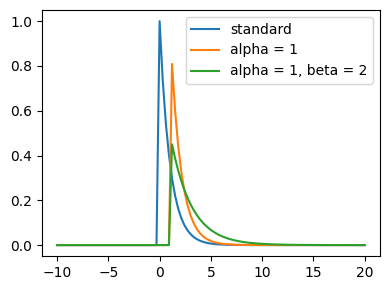

In [49]:
pts = np.linspace(-10, 20, 100)
pts_prob_std_exp = expon.pdf(pts)
pts_prob_shifted_exp = expon.pdf(pts, loc=1)
pts_prob_scaled_shifted_exp_2 = expon.pdf(pts, loc=1, scale = 2)

plt.figure(figsize=(4, 3))
plt.plot(pts, pts_prob_std_exp, label='standard')
plt.plot(pts, pts_prob_shifted_exp, label='alpha = 1')
plt.plot(pts, pts_prob_scaled_shifted_exp_2, label='alpha = 1, beta = 2')

plt.legend()
plt.tight_layout()
plt.show()

For a population having an exponential distribution:
 mean = 5, variance = 9


Randomly sampling 10 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/500 …

Randomly sampling 100 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/500…

Randomly sampling 1000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/50…

Randomly sampling 10000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/5…

Randomly sampling 100000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0/…

Randomly sampling 1000000 points using Expon(loc = 2, scale = 3) + calculating sample mean:   0%|          | 0…

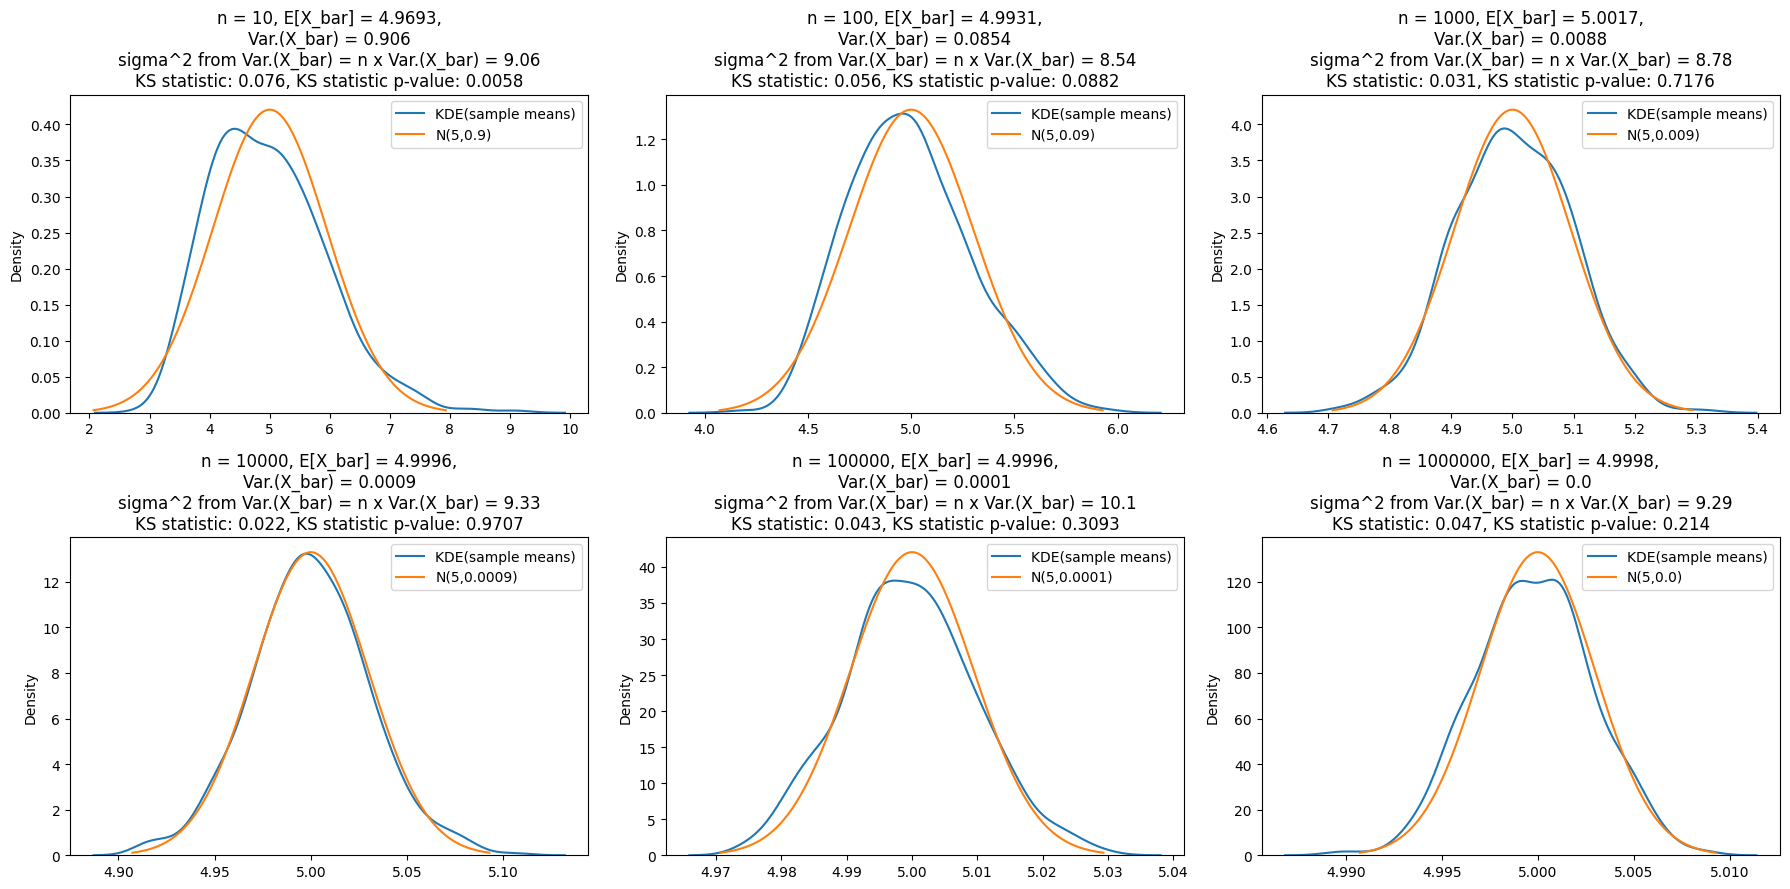

In [50]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# exponential distribution
alpha, beta = 2, 3
expon_mu, expon_sigma = alpha + beta, beta
print(f"For a population having an exponential distribution:"
    f"\n mean = {expon_mu}, variance = {expon_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using Expon(loc = {alpha}, scale = {beta}) + calculating sample mean"):
        sample_means.append(expon.rvs(loc = alpha, scale=beta, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = expon_mu
    sample_mean_clt_std = expon_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

## Log Normal distribution
- when the natural log of a random variable is normally distributed
- using $Y = ln(X) \textrm{ such that } f_Y(y) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\dfrac{(y-\mu')^2}{2\sigma'^2}} \Rightarrow f_X(x) = \dfrac{1}{x\sigma\sqrt{2\pi}} e^{-\dfrac{(ln(x)-\mu')^2}{2\sigma'^2}}$
    - $X = e^Y \rightarrow P(Y \le y) = P(X \le e^y) \Rightarrow f_Y(y) = \dfrac{d(P(X \le e^y))}{dy} = \dfrac{d(P(X \le e^y))}{dX}.\dfrac{dX}{dy} = f_X(x).e^y = f_X(x).x$
    - $f_Y(y) = f_X(x).x$
    - so if Y is normally distributed, $f_X(x) = \dfrac{1}{x}.f_Y(y) = \dfrac{1}{x\sigma\sqrt{2\pi}} e^{-\dfrac{(ln(x)-\mu')^2}{2\sigma'^2}} \quad (y = ln(x))$

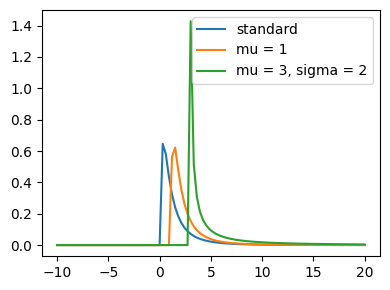

In [6]:
pts = np.linspace(-10, 20, 100)
pts_prob_std_lognorm = lognorm.pdf(pts, s=1)
pts_prob_shifted_lognorm = lognorm.pdf(pts, loc=1, s=1)
pts_prob_scaled_shifted_lognorm_2 = lognorm.pdf(pts, loc=3, s = 2)

plt.figure(figsize=(4, 3))
plt.plot(pts, pts_prob_std_lognorm, label='standard')
plt.plot(pts, pts_prob_shifted_lognorm, label='mu = 1')
plt.plot(pts, pts_prob_scaled_shifted_lognorm_2, label='mu = 3, sigma = 2')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# exponential distribution
mu, sigma = 3, 2
lognorm_mu, lognorm_sigma = alpha + beta, beta
print(f"For a population having an exponential distribution:"
    f"\n mean = {lognorm_mu}, variance = {lognorm_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using Expon(loc = {alpha}, scale = {beta}) + calculating sample mean"):
        sample_means.append(expon.rvs(loc = alpha, scale=beta, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = lognorm_mu
    sample_mean_clt_std = lognorm_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

## Cauchy Distribution


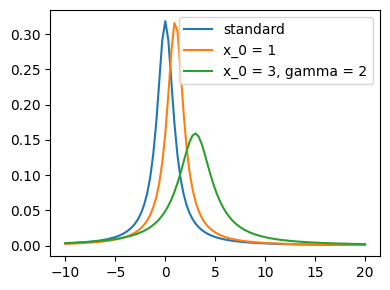

In [9]:
pts = np.linspace(-10, 20, 100)
pts_prob_std_cauchy = cauchy.pdf(pts)
pts_prob_shifted_cauchy = cauchy.pdf(pts, loc=1)
pts_prob_scaled_shifted_cauchy_2 = cauchy.pdf(pts, loc=3, scale = 2)

plt.figure(figsize=(4, 3))
plt.plot(pts, pts_prob_std_cauchy, label='standard')
plt.plot(pts, pts_prob_shifted_cauchy, label='x_0 = 1')
plt.plot(pts, pts_prob_scaled_shifted_cauchy_2, label='x_0 = 3, gamma = 2')

plt.legend()
plt.tight_layout()
plt.show()

For a population having an exponential distribution:
 mean = 3, variance = inf


Randomly sampling 10 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/500…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 100 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/50…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 1000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/5…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 10000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0/…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 100000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | 0…

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Randomly sampling 1000000 points using Cauchy(x_0 = 3, gamma = 2) + calculating sample mean:   0%|          | …

/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/numpy/core/function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start
/Users/akshayprabhakant/miniconda3/envs/sts/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2093: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


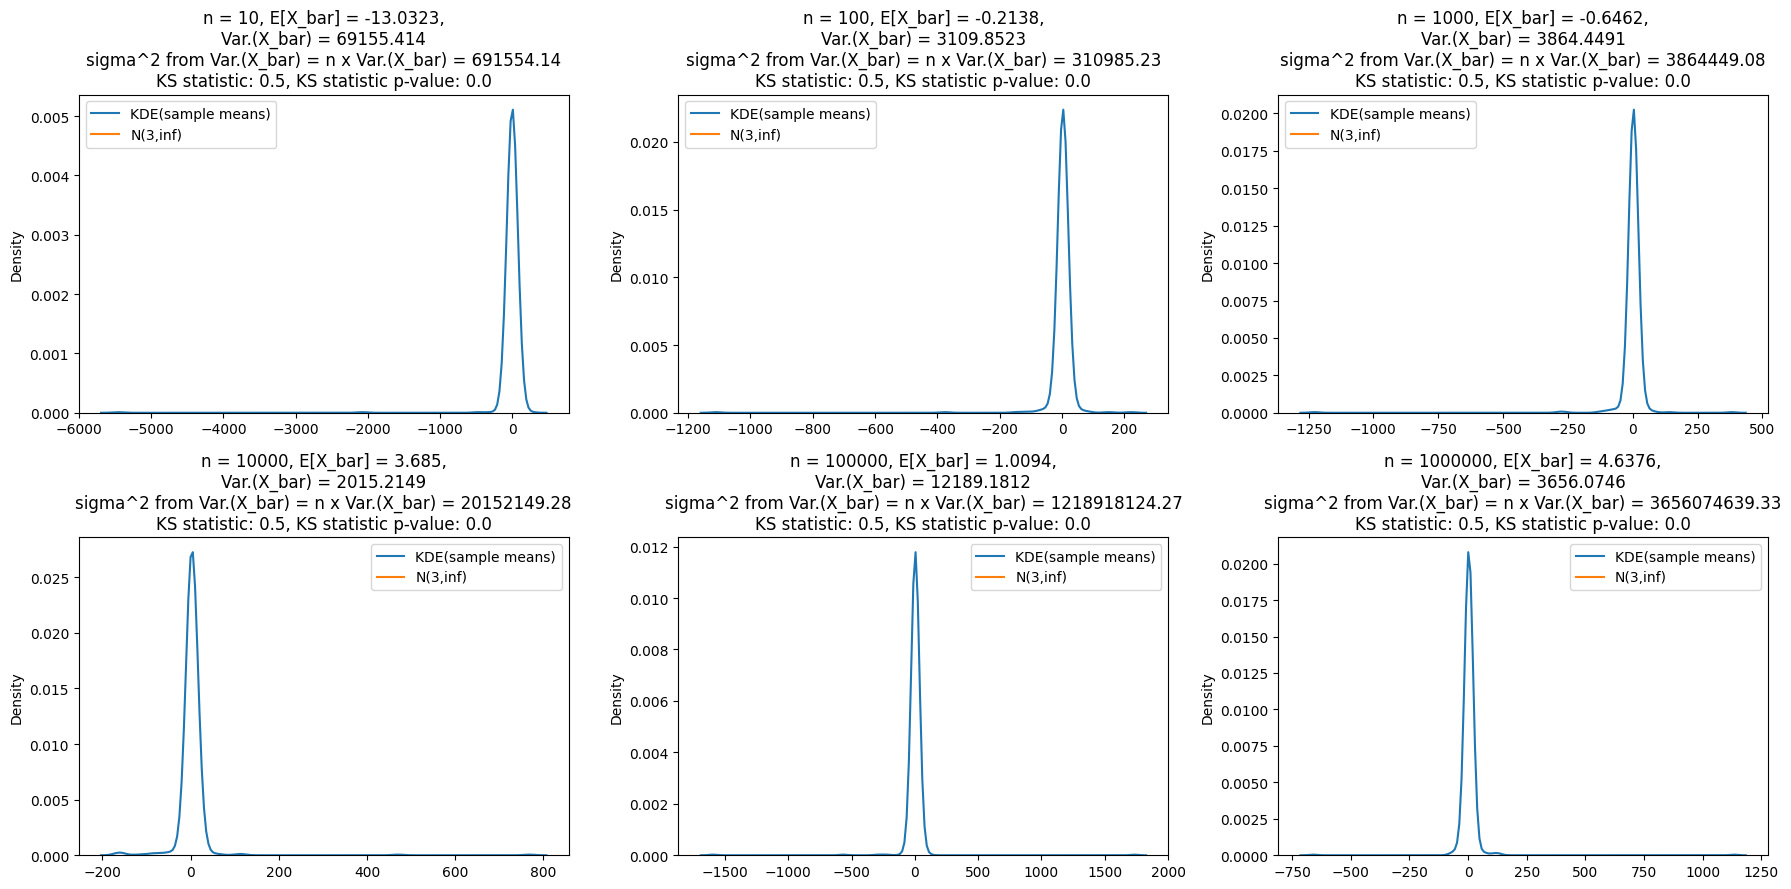

In [11]:
np.random.seed(42)

sample_sizes = [pow(10, x) for x in range(1,7,1)]

fig, ax = plt.subplots(2, 3, figsize=(18, 9))

# exponential distribution
x_0, gamma = 3, 2
cauchy_mu, cauchy_sigma = x_0, np.inf
print(f"For a population having an exponential distribution:"
    f"\n mean = {cauchy_mu}, variance = {cauchy_sigma ** 2}")

for sz_idz, sz_ in enumerate(sample_sizes):
    sample_means = []
    ax_i, ax_j = int(sz_idz/3), sz_idz % 3
    for _ in tqdm(range(500), f"Randomly sampling {sz_} points using Cauchy(x_0 = {x_0}, gamma = {gamma}) + calculating sample mean"):
        sample_means.append(cauchy.rvs(loc = x_0, scale=gamma, size = sz_).mean())

    sb.kdeplot(sample_means, label='KDE(sample means)', ax=ax[ax_i][ax_j])

    # plot the corresponding normal distribution
    sample_mean_clt_mean = cauchy_mu
    sample_mean_clt_std = cauchy_sigma/math.sqrt(sz_)
    norm_pdf_pts = np.linspace(norm.ppf(0.001, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), norm.ppf(0.999, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), 200)

    # Kolmogorov-Smironov divergence test to see how divergent the actual distribution of sample mean is from the theoretical normal distribution it should have
    ks_stat, ks_pvalue = kstest(sample_means, 'norm', args=(sample_mean_clt_mean, sample_mean_clt_std))


    ax[ax_i][ax_j].plot(norm_pdf_pts, norm.pdf(norm_pdf_pts, loc=sample_mean_clt_mean, scale=sample_mean_clt_std), label=f'N({sample_mean_clt_mean},{round(sample_mean_clt_std ** 2, 4)})')

    ax[ax_i][ax_j].set_title(f"n = {sz_}, E[X_bar] = {np.mean(sample_means).round(4)},\n"
                             f"Var.(X_bar) = {(np.std(sample_means) ** 2).round(4)}\n"
                            f"sigma^2 from Var.(X_bar) = n x Var.(X_bar) = {(sz_ * (np.std(sample_means) ** 2)).round(2)}\n"
                            f"KS statistic: {round(ks_stat,3)}, KS statistic p-value: {round(ks_pvalue,4)}")
    ax[ax_i][ax_j].legend()

plt.tight_layout()
plt.show()

# Impact of Bessel Correction